In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

In [3]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
X = pd.DataFrame(california_housing.data)
X.columns = california_housing.feature_names
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y = np.array(california_housing.target)
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X_train = scaler.fit_transform(X_train)

In [9]:
X_test = scaler.transform(X_test)

In [10]:
from sklearn import linear_model
rid = linear_model.Lasso()

In [11]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [12]:
from sklearn.model_selection import GridSearchCV
Ridge_reg= GridSearchCV(rid, parameters, scoring='neg_mean_squared_error',cv=10)

In [13]:
lass_tr = Ridge_reg.fit(X_train,y_train)
lass_tr

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e+02, tolerance: 1.751e+00
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [14]:
lass_pred=lass_tr.predict(X_test)
lass_pred

array([0.73274466, 1.76429632, 2.69669069, ..., 2.06863174, 1.57961496,
       1.82206757])

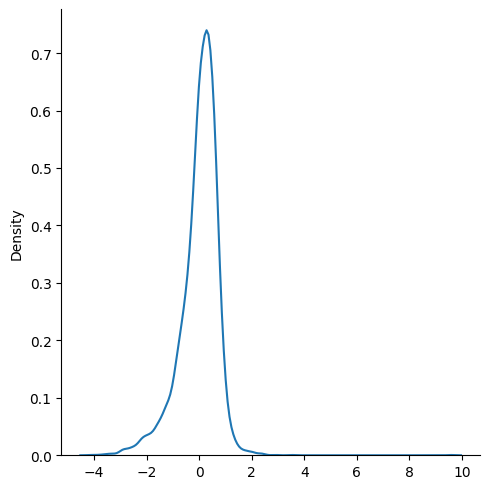

In [15]:
sns.displot(lass_pred-y_test,kind='kde')

In [16]:
from sklearn.metrics import r2_score,mean_squared_error

In [17]:
mean_squared_error(y_test,lass_pred)

0.5297443668521692

In [18]:
score = r2_score(y_test,lass_pred)
score

0.5963975777208825

In [19]:
lass_tr.best_params_

{'alpha': 0.001}

In [20]:
lass_tr.best_score_

-0.5256703788822217